### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import ipywidgets as widgets
from IPython.display import display

### Loading Data

In [2]:
data = pd.read_csv("uber-raw-data-sep14.csv")
data.head()

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

In [3]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

# Data Visualization

### Analysing "Date and Time"

In [4]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data.head()

Date/Time      Lat      Lon    Base
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512

In [5]:
data['Month'] = data["Date/Time"].dt.month
data['Day'] = data["Date/Time"].dt.day
data['Weekday'] = data["Date/Time"].dt.weekday
data['Hour'] = data["Date/Time"].dt.hour
data['Minute'] = data["Date/Time"].dt.minute
data['Second'] = data["Date/Time"].dt.second
data['Year'] = data["Date/Time"].dt.year

In [6]:
data.head()

Date/Time      Lat      Lon    Base  Month  Day  Weekday  Hour  \
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512      9    1        0     0   
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512      9    1        0     0   
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512      9    1        0     0   
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512      9    1        0     0   
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512      9    1        0     0   

   Minute  Second  Year  
0       1       0  2014  
1       1       0  2014  
2       3       0  2014  
3       6       0  2014  
4      11       0  2014

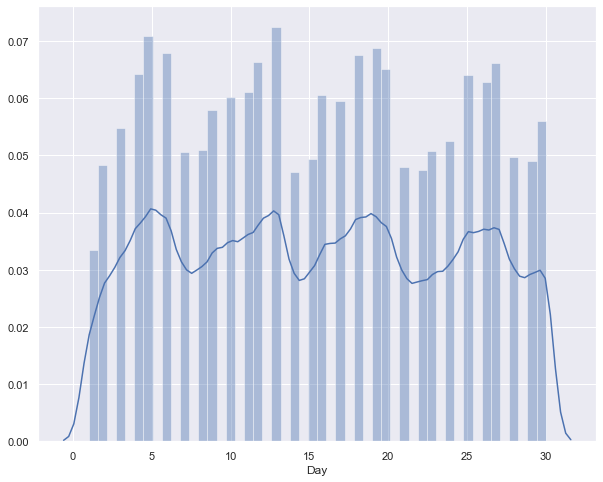

In [7]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.distplot(data["Day"])

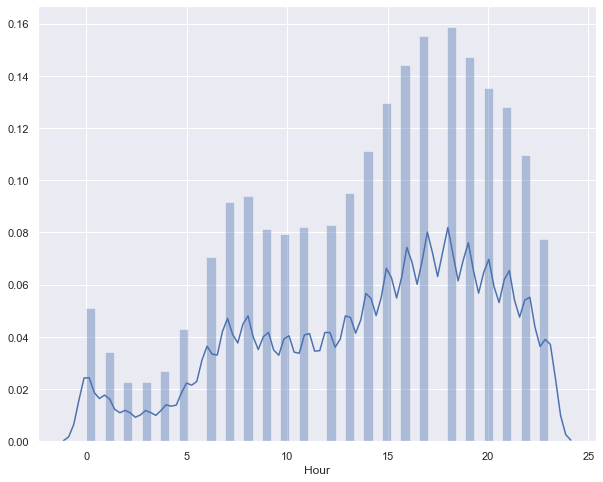

In [8]:
sns.distplot(data["Hour"])

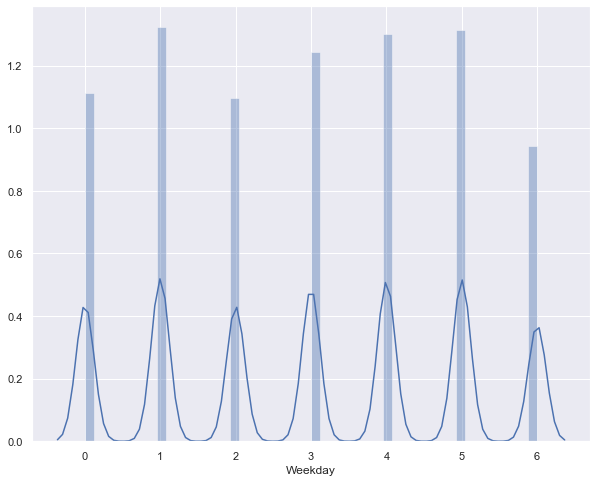

In [9]:
sns.distplot(data["Weekday"])

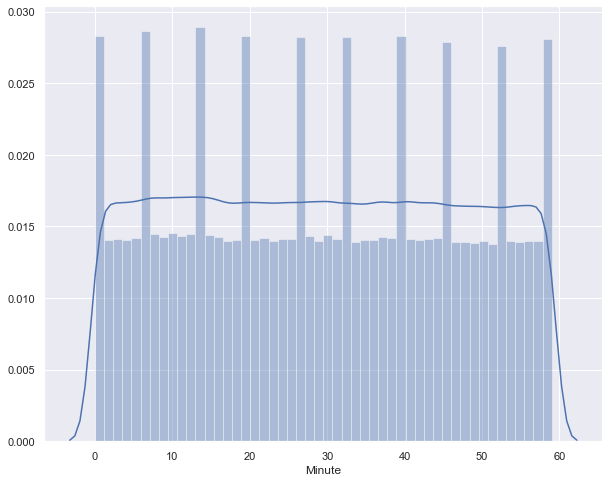

In [10]:
sns.distplot(data["Minute"])

c:\python\python37\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



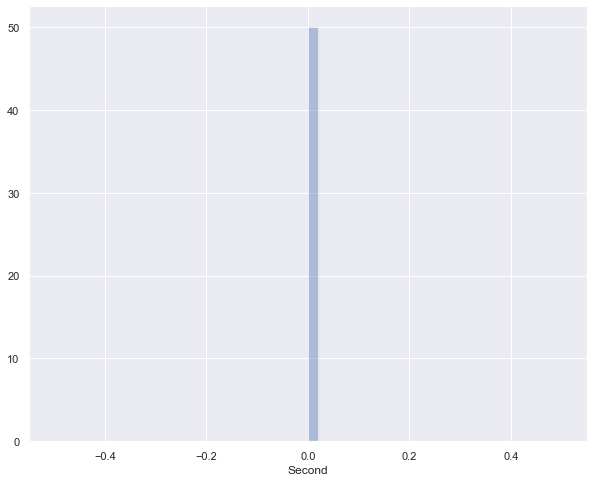

In [11]:
sns.distplot(data["Second"])

### Correlation of Weekday and Hour

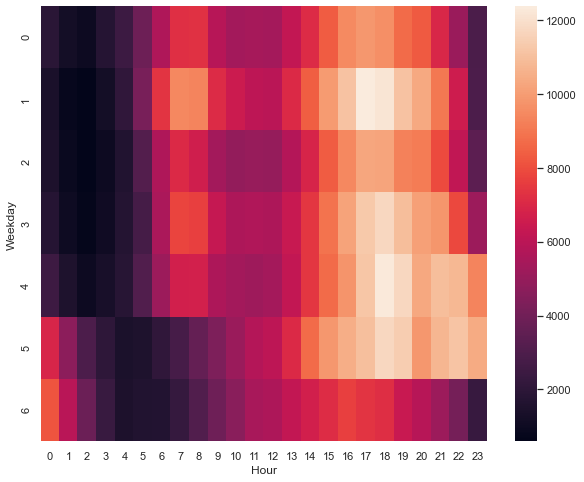

In [12]:
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

### Correlation of Weekday and Minute 

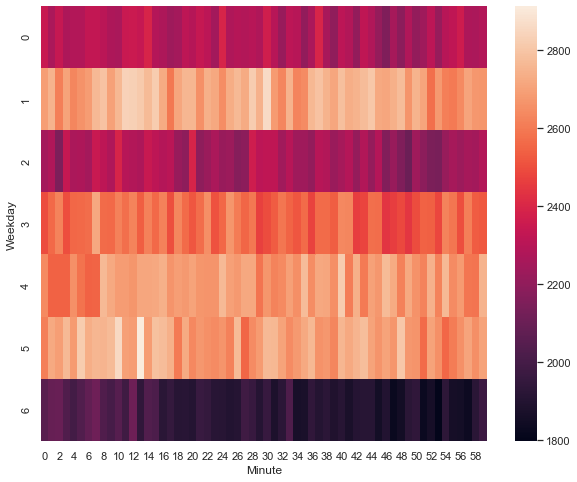

In [13]:
df = data.groupby(["Weekday", "Minute"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

### Correlation Hour and Minute 

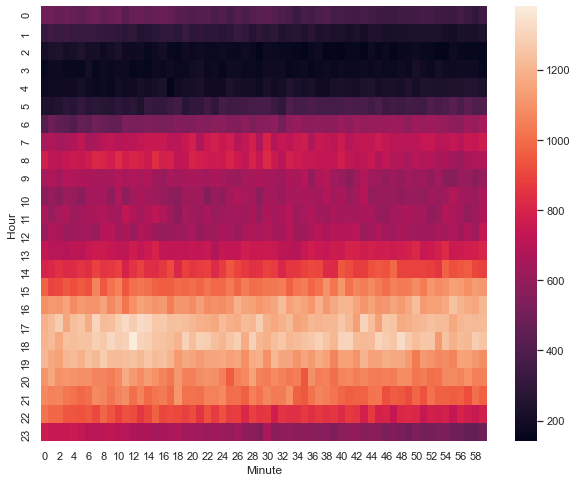

In [14]:
df = data.groupby(["Hour", "Minute"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

### Analysing "Latitude" and "Longitutude " column

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


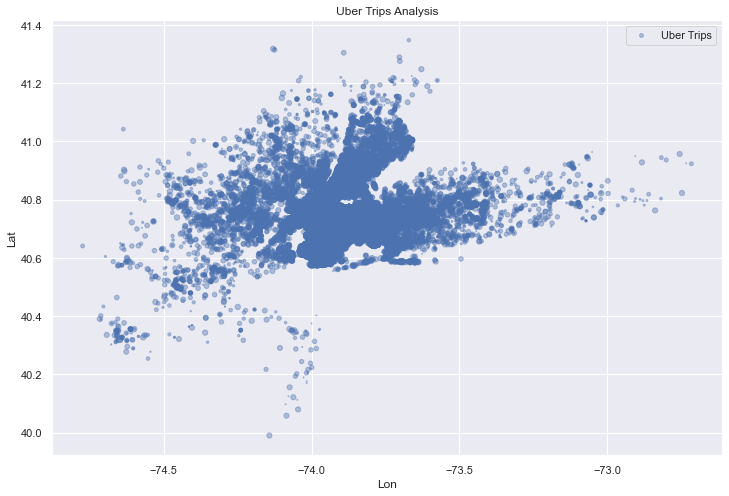

In [15]:
sns.set(rc={'figure.figsize':(10, 8)})
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

### Number of trips at each Month, Day, Hour, Minute

Text(0.5, 1.0, 'Mumber of trips per month')

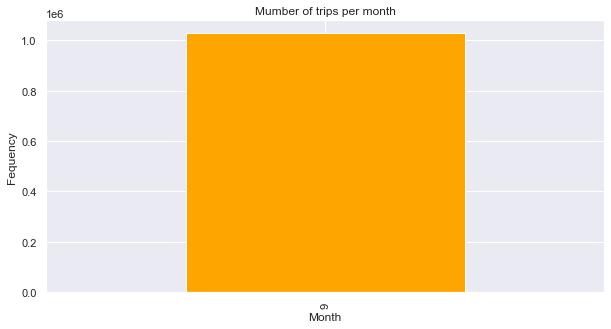

In [16]:
x = data['Month'].value_counts()
x.plot(kind = 'bar',figsize = (10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Fequency')
plt.title('Mumber of trips per month')

In [17]:
def plot_bar(xdata, ydata, chart_type, xlabel, colnum ):
    
    fig = go.Figure(data = [
        go.Bar(name = 'Count', 
               x = xdata, 
               y = ydata,
               marker_color = 'crimson',
              width = [0.5]*colnum)
       
    ])

    fig.update_layout(barmode = chart_type,
                     title = 'Trips on each '+ xlabel,
                     xaxis = dict(title = xlabel),
                     yaxis = dict(title = 'Total Count'))

    fig.show()

In [18]:
hour = data.groupby(['Hour'], as_index = False)['Base'].count()
plot_bar(hour['Hour'],hour['Base'],'group','Hour',24)

In [19]:
minute = data.groupby(['Minute'], as_index = False)['Base'].count()
plot_bar(minute['Minute'], minute['Base'], 'group', 'Minute',60)

In [20]:
day = data.groupby(['Day'], as_index = False)['Base'].count()
plot_bar(day['Day'], day['Base'], 'group', 'Day',30)

### Analyzing Weekdays

In [21]:
#total number of uber pickups on each day over the month
week_day = pd.DataFrame(data['Weekday'].value_counts())

In [22]:
week_day

Weekday
1   163230
5   162057
4   160380
3   153276
0   137288
2   135373
6   116532

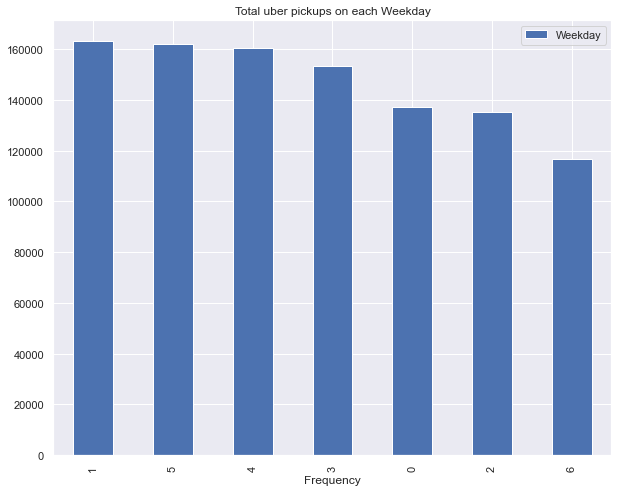

In [23]:
week_day.plot.bar()
plt.title('Total uber pickups on each Weekday')
plt.xlabel('weekday')
plt.xlabel('Frequency')
plt.show()

### Analyzing Hours 

In [24]:
#total number of uber pickups on each hours over the month
hours = pd.DataFrame(data['Hour'].value_counts())

In [25]:
hours

Hour
18  75040
17  73373
19  69660
16  68224
20  63988
15  61219
21  60606
14  52643
22  51817
13  45042
8   44477
7   43314
12  39193
11  38821
9   38542
10  37634
23  36568
6   33307
0   24133
5   20262
1   16107
4   12675
3   10789
2   10702

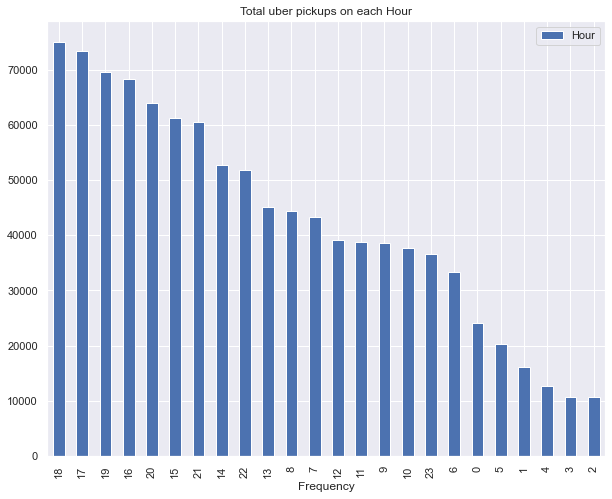

In [26]:
hours.plot.bar()
plt.title('Total uber pickups on each Hour')
plt.xlabel('Hour')
plt.xlabel('Frequency')
plt.show()

### Analyzing Minutes 

In [27]:
#total number of uber pickups on each minute over the month
minute = pd.DataFrame(data['Minute'].value_counts())

In [28]:
minute

Minute
10   17633
7    17583
12   17557
14   17555
8    17532
13   17527
15   17514
40   17475
30   17448
11   17417
28   17402
16   17345
37   17342
9    17315
33   17280
5    17222
1    17221
22   17210
20   17205
6    17199
59   17197
26   17196
44   17192
38   17181
24   17162
19   17159
3    17159
41   17150
43   17147
25   17123
31   17104
0    17091
4    17074
21   17071
36   17063
2    17061
42   17030
18   17029
35   17021
27   17008
54   17007
45   17001
17   16995
57   16991
29   16982
23   16975
32   16963
50   16960
56   16932
47   16908
34   16886
52   16884
48   16883
55   16881
58   16877
46   16851
39   16851
49   16813
51   16706
53   16590

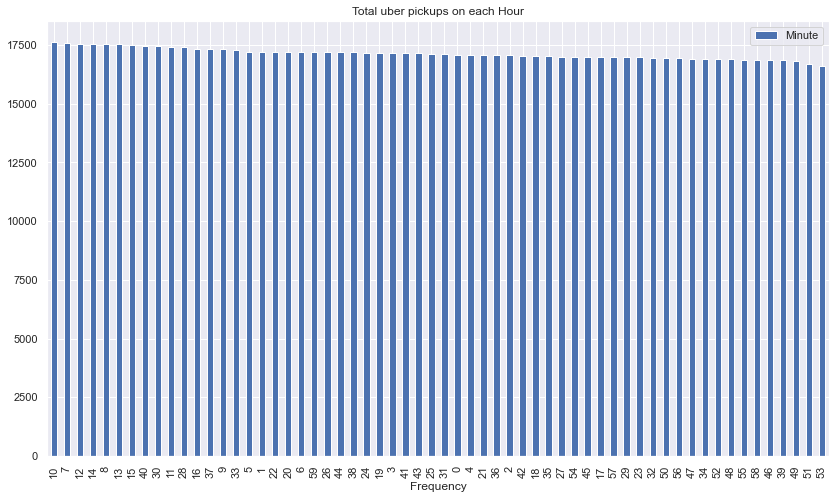

In [29]:
sns.set(rc={'figure.figsize':(14, 8)})
minute.plot.bar()
plt.title('Total uber pickups on each Hour')
plt.xlabel('Minute')
plt.xlabel('Frequency')
plt.show()

# Applying Sentimental Analysis 

In [30]:
data.shape

(1028136, 11)

In [31]:
f = open("words uber.txt", "r")

In [32]:
words = f.read()
f.close()
print(words)

Too expensive,Had A Good Ride,Charged for a postpaid ride,Rude cab drivers with very disappointing service,Rude cab drivers,very disappointing service,Endless Waiting,Best Cab Service,Fast Neat Cabs,Manners Maketh Man,Drivers Lack Professionalism,Very Good Services!,Charged me twice!,Work On Your App Issues,GPS never works!,Left Midway!,Cancel Bookings!,uber Passes for a flat discount!,Fake promotions!,Coupon Availability,Value For money!,High Fares!,Booking in Advance,Invalid Coupon Codes,Dropped at a wrong location!,Couldnâ€™t Navigate my location,Cheaper booking options available,drivers are never available!,Easy to book!,Horrendous Services,Poor customer service,Emergency needs,Happy Travel,Always On Time,Never Waste Money On Uber,Never again Uber.,Very unsatisfied,Thanks Uber for the best,Uber you're not that great,Uber is getting worst day by day,Promo wasnâ€™t accepted and very hard to complain.,3 strikes your out,Using your credit car is no safe in uber,Uber anti-disabled,Drive

In [33]:
wordsList = words.split(",")
print(wordsList)

['Too expensive', 'Had A Good Ride', 'Charged for a postpaid ride', 'Rude cab drivers with very disappointing service', 'Rude cab drivers', 'very disappointing service', 'Endless Waiting', 'Best Cab Service', 'Fast Neat Cabs', 'Manners Maketh Man', 'Drivers Lack Professionalism', 'Very Good Services!', 'Charged me twice!', 'Work On Your App Issues', 'GPS never works!', 'Left Midway!', 'Cancel Bookings!', 'uber Passes for a flat discount!', 'Fake promotions!', 'Coupon Availability', 'Value For money!', 'High Fares!', 'Booking in Advance', 'Invalid Coupon Codes', 'Dropped at a wrong location!', 'Couldnâ€™t Navigate my location', 'Cheaper booking options available', 'drivers are never available!', 'Easy to book!', 'Horrendous Services', 'Poor customer service', 'Emergency needs', 'Happy Travel', 'Always On Time', 'Never Waste Money On Uber', 'Never again Uber.', 'Very unsatisfied', 'Thanks Uber for the best', "Uber you're not that great", 'Uber is getting worst day by day', 'Promo wasnâ€™

In [34]:
len(wordsList)

101

In [35]:
x=np.array(wordsList)
x=np.repeat(x, 1028136//100)
print(x)

['Too expensive' 'Too expensive' 'Too expensive' ... 'Over Charged'
 'Over Charged' 'Over Charged']


In [36]:
import random
random.shuffle(x)
print(x)

['Worst better try local taxi'
 'Promo wasnâ€™t accepted and very hard to complain.' ' unfair' ...
 'Use UBER all the time and love it' 'Left Midway!' 'Cool Experience']


In [37]:
x.shape

(1038381,)

In [38]:
data["Feedback"] = x[0:1028136]

In [39]:
data.head()

Date/Time      Lat      Lon    Base  Month  Day  Weekday  Hour  \
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512      9    1        0     0   
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512      9    1        0     0   
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512      9    1        0     0   
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512      9    1        0     0   
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512      9    1        0     0   

   Minute  Second  Year                                           Feedback  
0       1       0  2014                        Worst better try local taxi  
1       1       0  2014  Promo wasnâ€™t accepted and very hard to compl...  
2       3       0  2014                                             unfair  
3       6       0  2014                         Uber you're not that great  
4      11       0  2014                   Uber is getting worst day by day

In [40]:
data.tail()

Date/Time      Lat      Lon    Base  Month  Day  Weekday  \
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764      9   30        1   
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764      9   30        1   
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764      9   30        1   
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764      9   30        1   
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764      9   30        1   

         Hour  Minute  Second  Year  \
1028131    22      57       0  2014   
1028132    22      57       0  2014   
1028133    22      58       0  2014   
1028134    22      58       0  2014   
1028135    22      58       0  2014   

                                                  Feedback  
1028131                    I would have missed my flight!!  
1028132                                   Very unsatisfied  
1028133   good to have and important if you don't own y...  
1028134                        Worst company ever to work.  
1028135           Using your credit car is no safe in uber

In [41]:
data.Feedback

0                                Worst better try local taxi
1          Promo wasnâ€™t accepted and very hard to compl...
2                                                     unfair
3                                 Uber you're not that great
4                           Uber is getting worst day by day
                                 ...                        
1028131                      I would have missed my flight!!
1028132                                     Very unsatisfied
1028133     good to have and important if you don't own y...
1028134                          Worst company ever to work.
1028135             Using your credit car is no safe in uber
Name: Feedback, Length: 1028136, dtype: object

### Before jumping to the exploration stage, we need to perform basic data pre-processing steps like null value imputation and removal of unwanted data. Let’s see if there are any null values present in our dataset:

In [42]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
Month        0
Day          0
Weekday      0
Hour         0
Minute       0
Second       0
Year         0
Feedback     0
dtype: int64

There are a no null values in the dataset. So, we dont need to drop any null values and we can proceed further:

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
 4   Month      1028136 non-null  int64         
 5   Day        1028136 non-null  int64         
 6   Weekday    1028136 non-null  int64         
 7   Hour       1028136 non-null  int64         
 8   Minute     1028136 non-null  int64         
 9   Second     1028136 non-null  int64         
 10  Year       1028136 non-null  int64         
 11  Feedback   1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 94.1+ MB


In [44]:
data.describe()

Lat           Lon      Month           Day       Weekday  \
count  1.028136e+06  1.028136e+06  1028136.0  1.028136e+06  1.028136e+06   
mean   4.073922e+01 -7.397182e+01        9.0  1.555385e+01  2.961477e+00   
std    4.082861e-02  5.831413e-02        0.0  8.448335e+00  1.942572e+00   
min    3.998970e+01 -7.477360e+01        9.0  1.000000e+00  0.000000e+00   
25%    4.072040e+01 -7.399620e+01        9.0  8.000000e+00  1.000000e+00   
50%    4.074180e+01 -7.398310e+01        9.0  1.600000e+01  3.000000e+00   
75%    4.076120e+01 -7.396280e+01        9.0  2.300000e+01  5.000000e+00   
max    4.134760e+01 -7.271630e+01        9.0  3.000000e+01  6.000000e+00   

               Hour        Minute     Second       Year  
count  1.028136e+06  1.028136e+06  1028136.0  1028136.0  
mean   1.409235e+01  2.936210e+01        0.0     2014.0  
std    5.971244e+00  1.730358e+01        0.0        0.0  
min    0.000000e+00  0.000000e+00        0.0     2014.0  
25%    1.000000e+01  1.400000e+01        0.0     2014.0  
50%    1.500000e+01  2.900000e+01        0.0     2014.0  
75%    1.900000e+01  4.400000e+01        0.0     2014.0  
max    2.300000e+01  5.900000e+01        0.0     2014.0

In [45]:
corrmat = data.corr()
corrmat

Lat       Lon  Month       Day   Weekday      Hour    Minute  \
Lat      1.000000  0.046376    NaN  0.002558 -0.035468 -0.009160 -0.003142   
Lon      0.046376  1.000000    NaN -0.003939  0.002319 -0.008839 -0.003940   
Month         NaN       NaN    NaN       NaN       NaN       NaN       NaN   
Day      0.002558 -0.003939    NaN  1.000000  0.049310 -0.023598 -0.000650   
Weekday -0.035468  0.002319    NaN  0.049310  1.000000 -0.003776 -0.003199   
Hour    -0.009160 -0.008839    NaN -0.023598 -0.003776  1.000000 -0.011158   
Minute  -0.003142 -0.003940    NaN -0.000650 -0.003199 -0.011158  1.000000   
Second        NaN       NaN    NaN       NaN       NaN       NaN       NaN   
Year          NaN       NaN    NaN       NaN       NaN       NaN       NaN   

         Second  Year  
Lat         NaN   NaN  
Lon         NaN   NaN  
Month       NaN   NaN  
Day         NaN   NaN  
Weekday     NaN   NaN  
Hour        NaN   NaN  
Minute      NaN   NaN  
Second      NaN   NaN  
Year        NaN   NaN

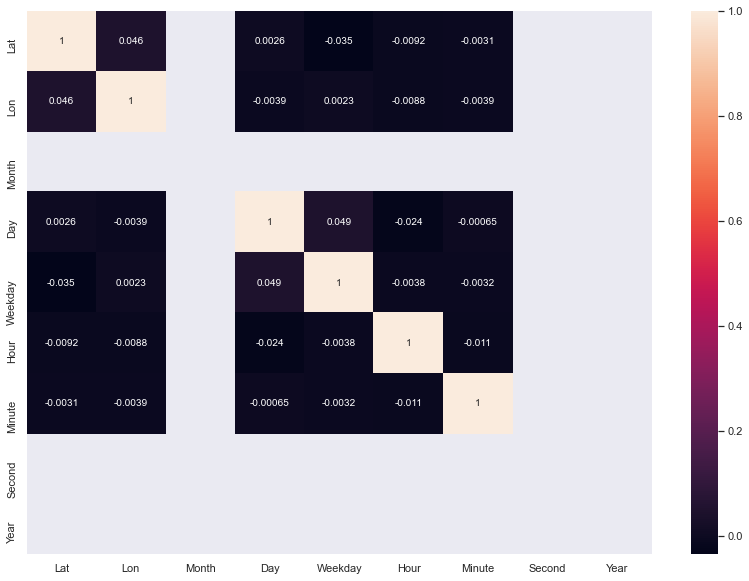

In [46]:
fig, ax=plt.subplots(figsize=(14,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':10})

### Data Cleaning

#### Lowercase the reviews

In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase:

In [47]:
data["Feedback"]=data["Feedback"].apply(lambda x:x.lower()) 

In [48]:
data["Feedback"]

0                                worst better try local taxi
1          promo wasnâ€™t accepted and very hard to compl...
2                                                     unfair
3                                 uber you're not that great
4                           uber is getting worst day by day
                                 ...                        
1028131                      i would have missed my flight!!
1028132                                     very unsatisfied
1028133     good to have and important if you don't own y...
1028134                          worst company ever to work.
1028135             using your credit car is no safe in uber
Name: Feedback, Length: 1028136, dtype: object

#### Remove digits and words containing digits 

Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [49]:
import re

In [50]:
data["Feedback"]=data["Feedback"].apply(lambda x: re.sub('\w*\d\w*','', x))
data["Feedback"]

0                                worst better try local taxi
1          promo wasnâ€™t accepted and very hard to compl...
2                                                     unfair
3                                 uber you're not that great
4                           uber is getting worst day by day
                                 ...                        
1028131                      i would have missed my flight!!
1028132                                     very unsatisfied
1028133     good to have and important if you don't own y...
1028134                          worst company ever to work.
1028135             using your credit car is no safe in uber
Name: Feedback, Length: 1028136, dtype: object

#### Remove Punctuations

Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

In [51]:
import string

In [52]:
data["Feedback"]=data["Feedback"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
data["Feedback"]

0                                worst better try local taxi
1          promo wasnâ€™t accepted and very hard to complain
2                                                     unfair
3                                  uber youre not that great
4                           uber is getting worst day by day
                                 ...                        
1028131                        i would have missed my flight
1028132                                     very unsatisfied
1028133     good to have and important if you dont own yo...
1028134                           worst company ever to work
1028135             using your credit car is no safe in uber
Name: Feedback, Length: 1028136, dtype: object

In [53]:
# Removing extra spaces
data["Feedback"]=data["Feedback"].apply(lambda x: re.sub(' +',' ',x))

In [54]:
#Let’s how our text looks after cleaning:

for index,text in enumerate(data["Feedback"][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 uber driver mr nitin with cab number white maruti swift desire is an excellent chauffeur 
Review 2:
 endless waiting
Review 3:
 easy to book
Review 4:
 drivers are never available
Review 5:
  unfair


### Preparing Text Data for Exploratory Data Analysis (EDA)

We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus.

### Now we’ll do the following Preprocessing on Data

### Stopwords Removal :

Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

### Lemmatization :

Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.

### Create Document Term Matrix :

A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews.

In [55]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
#removal of stop words
stop = stopwords.words('english')
data['Feedback'] = data['Feedback'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [57]:
data.tail(10)

Date/Time      Lat      Lon    Base  Month  Day  Weekday  \
1028126 2014-09-30 22:56:00  40.7371 -74.0289  B02764      9   30        1   
1028127 2014-09-30 22:56:00  40.6446 -73.7823  B02764      9   30        1   
1028128 2014-09-30 22:56:00  40.7163 -73.9623  B02764      9   30        1   
1028129 2014-09-30 22:57:00  40.6979 -73.9365  B02764      9   30        1   
1028130 2014-09-30 22:57:00  40.7300 -73.9565  B02764      9   30        1   
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764      9   30        1   
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764      9   30        1   
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764      9   30        1   
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764      9   30        1   
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764      9   30        1   

         Hour  Minute  Second  Year                            Feedback  
1028126    22      56       0  2014                treats drivers wrong  
1028127    22      56       0  2014          paid toll amount even toll  
1028128    22      56       0  2014                  safety really good  
1028129    22      57       0  2014                     cancel bookings  
1028130    22      57       0  2014  cheating driver poor customer care  
1028131    22      57       0  2014                 would missed flight  
1028132    22      57       0  2014                         unsatisfied  
1028133    22      58       0  2014       good important dont car drive  
1028134    22      58       0  2014             worst company ever work  
1028135    22      58       0  2014          using credit car safe uber

In [58]:
data.head()

Date/Time      Lat      Lon    Base  Month  Day  Weekday  Hour  \
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512      9    1        0     0   
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512      9    1        0     0   
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512      9    1        0     0   
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512      9    1        0     0   
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512      9    1        0     0   

   Minute  Second  Year                               Feedback  
0       1       0  2014            worst better try local taxi  
1       1       0  2014  promo wasnâ€™t accepted hard complain  
2       3       0  2014                                 unfair  
3       6       0  2014                       uber youre great  
4      11       0  2014             uber getting worst day day

In [59]:
#lemmatization

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [61]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [62]:
data['Feedback'] = data['Feedback'].apply(lemmatize_text)
data.tail(10)

Date/Time      Lat      Lon    Base  Month  Day  Weekday  \
1028126 2014-09-30 22:56:00  40.7371 -74.0289  B02764      9   30        1   
1028127 2014-09-30 22:56:00  40.6446 -73.7823  B02764      9   30        1   
1028128 2014-09-30 22:56:00  40.7163 -73.9623  B02764      9   30        1   
1028129 2014-09-30 22:57:00  40.6979 -73.9365  B02764      9   30        1   
1028130 2014-09-30 22:57:00  40.7300 -73.9565  B02764      9   30        1   
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764      9   30        1   
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764      9   30        1   
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764      9   30        1   
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764      9   30        1   
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764      9   30        1   

         Hour  Minute  Second  Year                            Feedback  
1028126    22      56       0  2014                  treat driver wrong  
1028127    22      56       0  2014          paid toll amount even toll  
1028128    22      56       0  2014                  safety really good  
1028129    22      57       0  2014                      cancel booking  
1028130    22      57       0  2014  cheating driver poor customer care  
1028131    22      57       0  2014                 would missed flight  
1028132    22      57       0  2014                         unsatisfied  
1028133    22      58       0  2014       good important dont car drive  
1028134    22      58       0  2014             worst company ever work  
1028135    22      58       0  2014          using credit car safe uber

In [63]:
# Creating Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(data.Feedback)

# Select the first five rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:1028136]  
td.columns = vect.get_feature_names()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, 1028137)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

            Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
uber            0      0      0      1      1      0      1      0      0   
driver          0      0      0      0      0      0      0      0      0   
service         0      0      0      0      0      0      0      0      0   
good            0      0      0      0      0      0      0      0      0   
cab             0      0      0      0      0      0      0      0      0   
time            0      0      0      0      0      0      0      0      0   
experience      0      0      0      0      0      0      0      0      0   
never           0      0      0      0      0      0      0      0      0   
worst           1      0      0      0      1      0      0      0      0   
car             0      0      0      0      0      0      0      0      0   

            Doc 10  ...  Doc 1028127  Doc 1028128  Doc 1028129  Doc 1028130  \
uber             0  ...            0            0            0           

Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

### Exploratory Data Analysis on Uber Trips Feedback

So, let’s start by looking at the common words present in the reviews for each product. For this, I will use the document term matrix created earlier with word clouds for plotting these words. Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

Word clouds can be generated using the wordcloud library. So, let’s plot word clouds for each feedback:

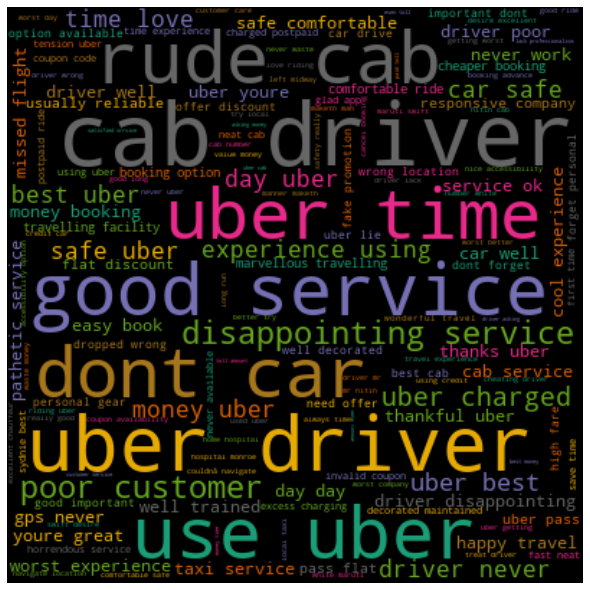

In [64]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
# For visualizations
import matplotlib.pyplot as plt


all_words = " ".join( [review for review in data["Feedback"]])
wordcloud = WordCloud(width=400, height=400, max_words=150,colormap="Dark2").generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 9)) 
plt.imshow(wordcloud, interpolation='bilinear') 

plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Here, we can see that GOOD,SERVICE,UBER, DRIVER,DISAPPOINTING,LOVE,BEST,CHARGED are the most frequently occurring words for almost every ride. This means that users are loving rides from Uber and found using them a great decision. They also found them easy to use.
Now, let’s say Uber wants to dig deeper into this and wants to know what they should improve. We can find the answer to this question by doing a sentiment analysis of the reviews for each ride. Sentiment analysis is the analysis of how much a piece of text is positive and opinionated.
Here, in this case, checking only the polarity, i.e., how much a text is positive or negative, is sufficient. We can check the polarity of a review using the TextBlob library in Python:

In [65]:
#adding subjectivity and polarity of each feedback
from textblob import TextBlob
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data["Feedback"].apply(getsubjectivity)
data['Polarity'] = data["Feedback"].apply(getPolarity)

data

Date/Time      Lat      Lon    Base  Month  Day  Weekday  \
0       2014-09-01 00:01:00  40.2201 -74.0021  B02512      9    1        0   
1       2014-09-01 00:01:00  40.7500 -74.0027  B02512      9    1        0   
2       2014-09-01 00:03:00  40.7559 -73.9864  B02512      9    1        0   
3       2014-09-01 00:06:00  40.7450 -73.9889  B02512      9    1        0   
4       2014-09-01 00:11:00  40.8145 -73.9444  B02512      9    1        0   
...                     ...      ...      ...     ...    ...  ...      ...   
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764      9   30        1   
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764      9   30        1   
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764      9   30        1   
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764      9   30        1   
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764      9   30        1   

         Hour  Minute  Second  Year                               Feedback  \
0           0       1       0  2014            worst better try local taxi   
1           0       1       0  2014  promo wasnâ€™t accepted hard complain   
2           0       3       0  2014                                 unfair   
3           0       6       0  2014                       uber youre great   
4           0      11       0  2014             uber getting worst day day   
...       ...     ...     ...   ...                                    ...   
1028131    22      57       0  2014                    would missed flight   
1028132    22      57       0  2014                            unsatisfied   
1028133    22      58       0  2014          good important dont car drive   
1028134    22      58       0  2014                worst company ever work   
1028135    22      58       0  2014             using credit car safe uber   

         Subjectivity  Polarity  
0            0.500000 -0.166667  
1            0.541667 -0.291667  
2            1.000000 -0.500000  
3            0.750000  0.800000  
4            1.000000 -1.000000  
...               ...       ...  
1028131      0.000000  0.000000  
1028132      0.000000  0.000000  
1028133      0.800000  0.550000  
1028134      1.000000 -1.000000  
1028135      0.500000  0.500000  

[1028136 rows x 14 columns]

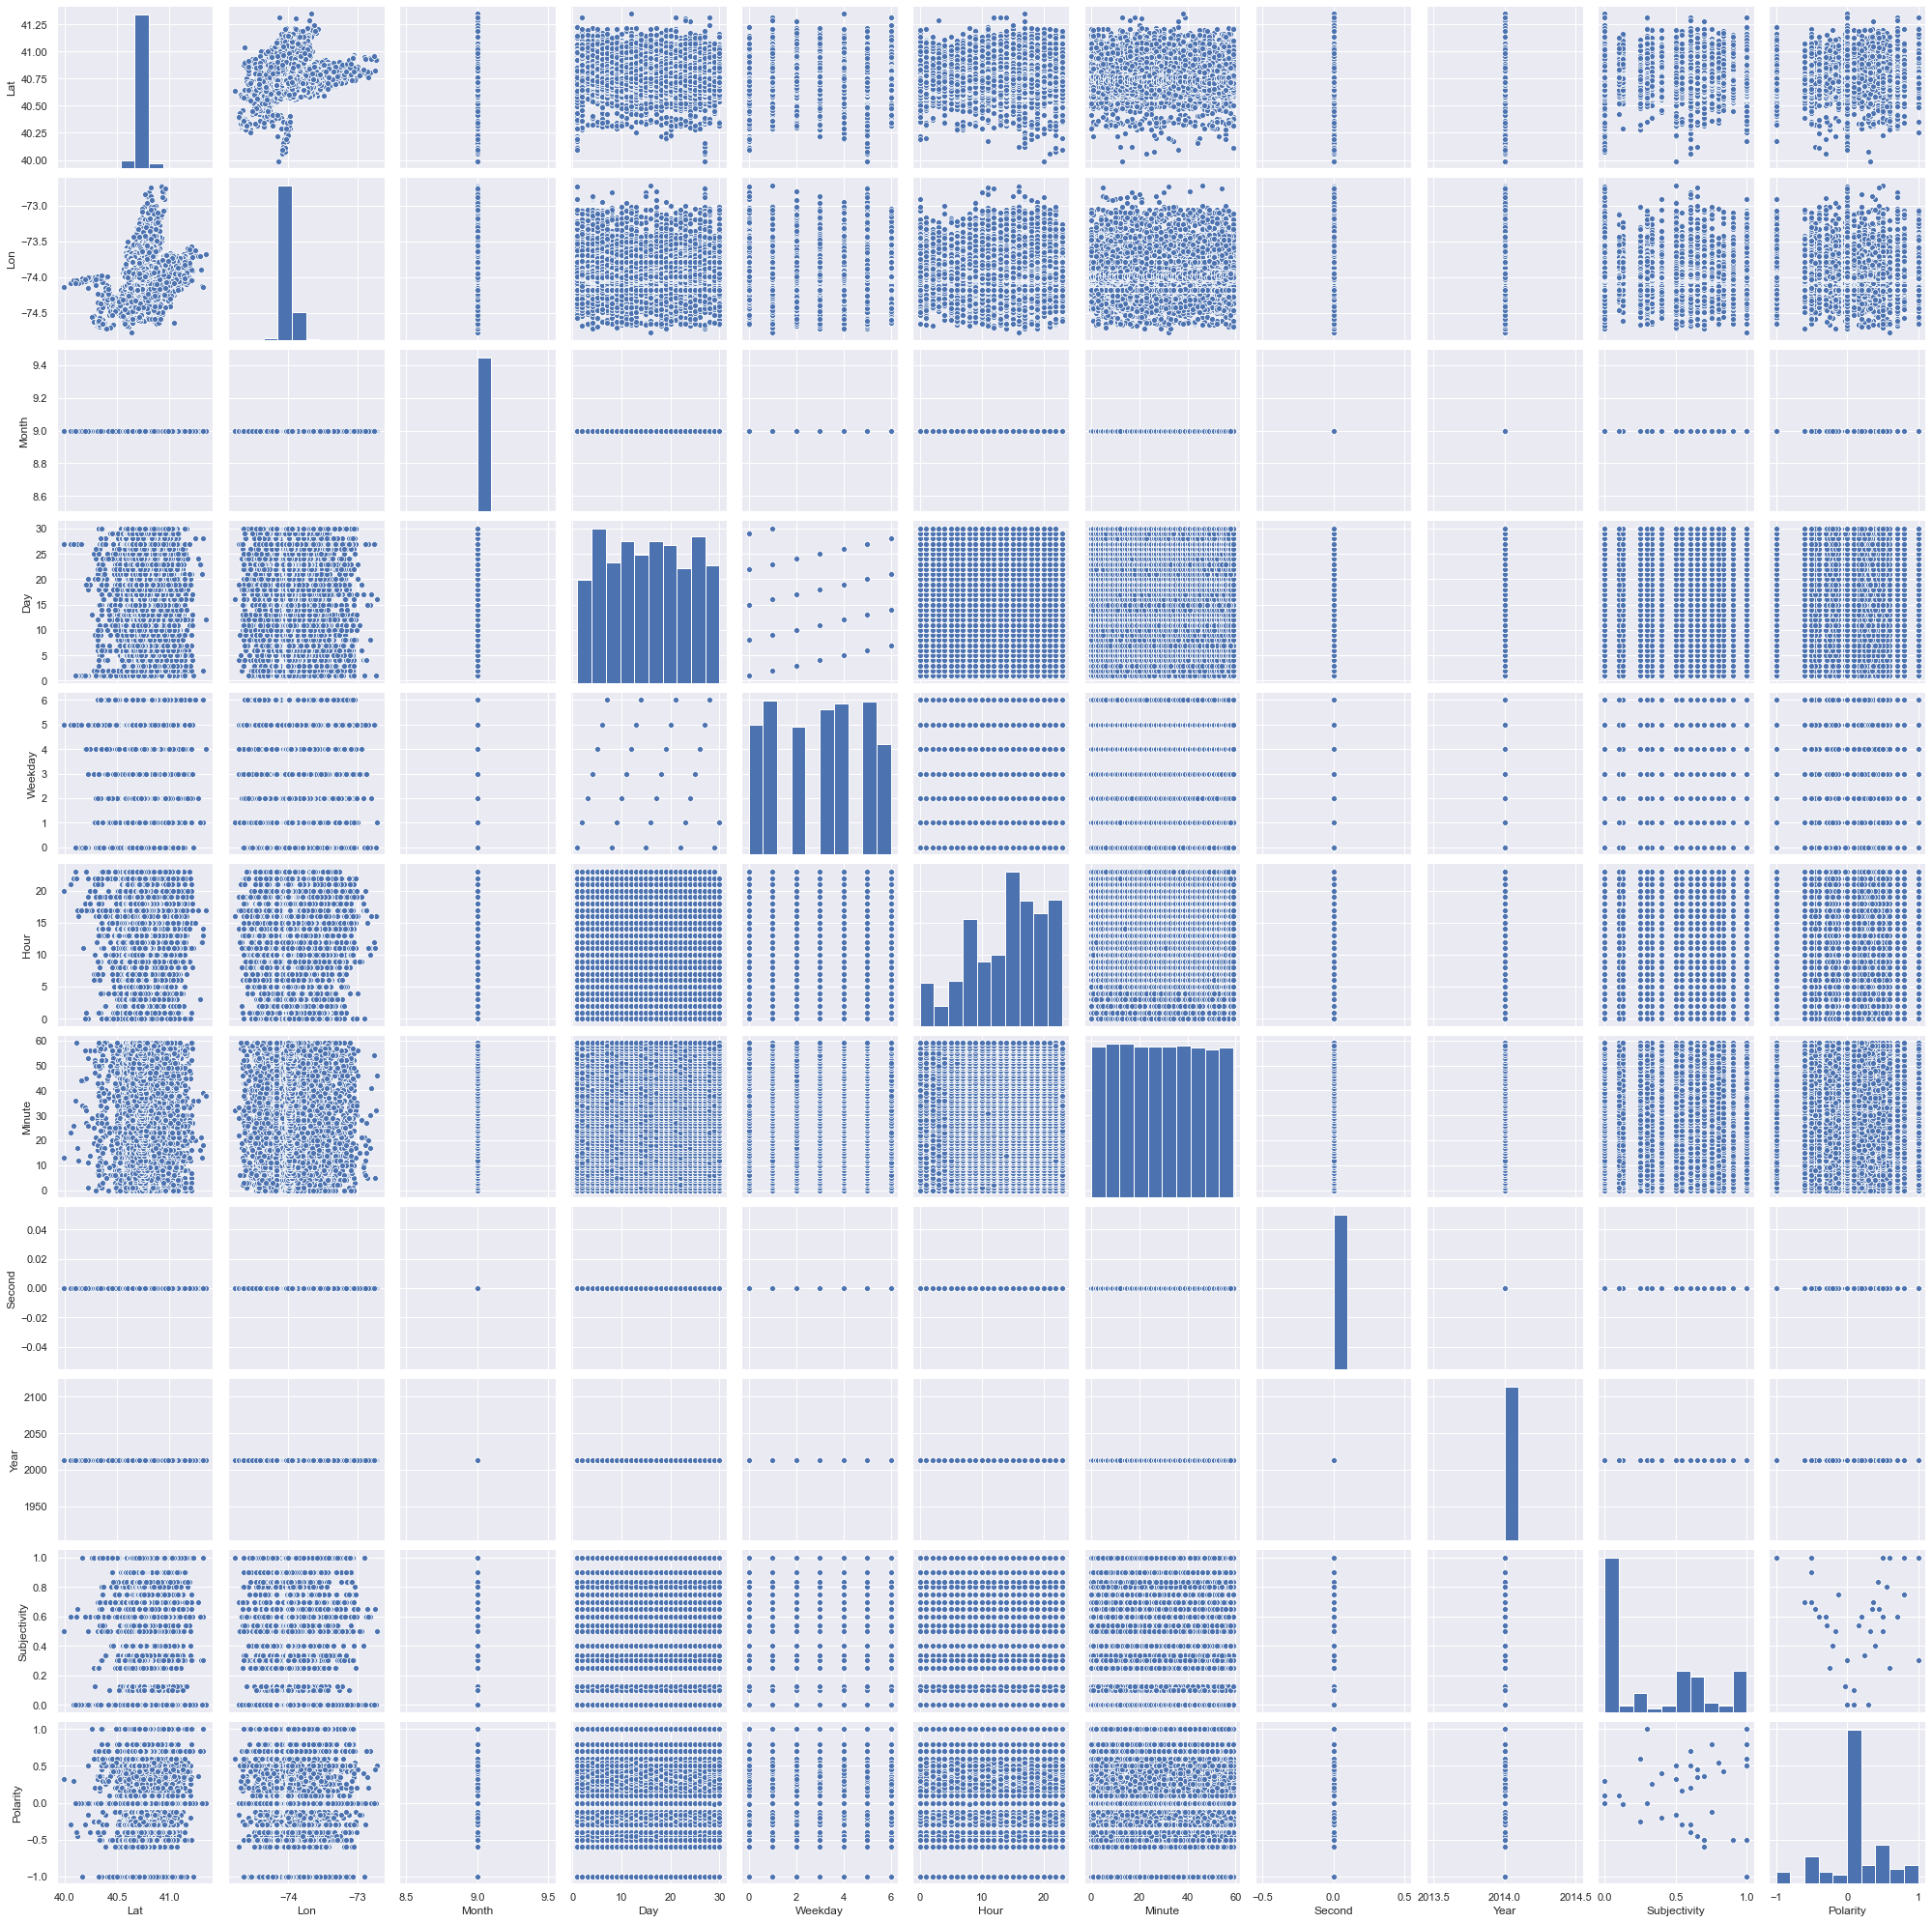

In [66]:
sns.pairplot(data)

### As we have the polarity scores for each feedback, we can start to compute positive and negative analysis of the feedback. For this, we need to create a function.

In [67]:
def Analysis(score): 
    if score < 0:
        return 0

    elif score>=0:
        return 1

data["Sentiments"] = data["Polarity"].apply(Analysis)

In [68]:
data.tail(10)

Date/Time      Lat      Lon    Base  Month  Day  Weekday  \
1028126 2014-09-30 22:56:00  40.7371 -74.0289  B02764      9   30        1   
1028127 2014-09-30 22:56:00  40.6446 -73.7823  B02764      9   30        1   
1028128 2014-09-30 22:56:00  40.7163 -73.9623  B02764      9   30        1   
1028129 2014-09-30 22:57:00  40.6979 -73.9365  B02764      9   30        1   
1028130 2014-09-30 22:57:00  40.7300 -73.9565  B02764      9   30        1   
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764      9   30        1   
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764      9   30        1   
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764      9   30        1   
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764      9   30        1   
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764      9   30        1   

         Hour  Minute  Second  Year                            Feedback  \
1028126    22      56       0  2014                  treat driver wrong   
1028127    22      56       0  2014          paid toll amount even toll   
1028128    22      56       0  2014                  safety really good   
1028129    22      57       0  2014                      cancel booking   
1028130    22      57       0  2014  cheating driver poor customer care   
1028131    22      57       0  2014                 would missed flight   
1028132    22      57       0  2014                         unsatisfied   
1028133    22      58       0  2014       good important dont car drive   
1028134    22      58       0  2014             worst company ever work   
1028135    22      58       0  2014          using credit car safe uber   

         Subjectivity  Polarity  Sentiments  
1028126           0.9     -0.50           0  
1028127           0.0      0.00           1  
1028128           0.6      0.70           1  
1028129           0.0      0.00           1  
1028130           0.6     -0.40           0  
1028131           0.0      0.00           1  
1028132           0.0      0.00           1  
1028133           0.8      0.55           1  
1028134           1.0     -1.00           0  
1028135           0.5      0.50           1